In [4]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
ROOT = Path().resolve().parent
if str(ROOT) not in sys.path:
    sys.path.insert(1, str(ROOT))
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from frequency_response import FrequencyResponse
import biquad

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
harman = FrequencyResponse.read_from_csv(ROOT.joinpath('compensation/harman_over-ear_2018_wo_bass.csv'))
bass_boost = biquad.digital_coeffs(
    harman.frequency,
    46010,
    *biquad.low_shelf(105, 0.7, 6, 46010)
)
harman.raw += bass_boost
ear_degain = biquad.digital_coeffs(
    harman.frequency,
    46010,
    *biquad.peaking(3766, 0.63, -1.5)
)
harman.raw += ear_degain
harman.center()
harman.name = 'AutoEq In-ear Target'

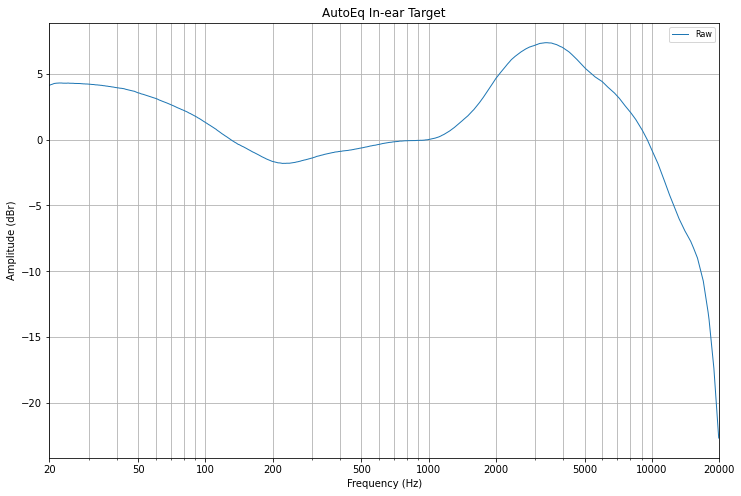

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'AutoEq In-ear Target'}, xlabel='Frequency (Hz)', ylabel='Amplitude (dBr)'>)

In [23]:
harman.plot_graph(color='C0', file_path=ROOT.joinpath('compensation/autoeq_in-ear.png'))

In [19]:
harman.write_to_csv(ROOT.joinpath('compensation/autoeq_in-ear.csv'))

In [ ]:
harman.